In [1]:
#load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

## Problem statement:

The synthetic process is to simulate a continous stirred tank reactor (CSTR). Reactant A flows at flow rate Q, initial temperature T_in, and initial concentration of C_{A,in}. The reactor has volume V. Reactant A is degraded to product B (A->B). The reaction is irreversible and exothermic, and degradation rate is temperature-dependent. The higher the temperature, the faster the degradation rate. A cooling jacket is wrapped around the reactor to control the temperature. Chemical A is toxic but B is not. To discarchge the effluent to lake or river, it requires the concentration of A below a threshold (i.e., 0.2 mol/L). For safety reason, the reactor temperatuer shall not exceed 400 Kelvin. The cooling water has temperature adjustable range between 250 K and 350 K.

<img src="CSTR.png" width=400 height=300 />

## Objective

The objective is to control the process so that the reaction occurs at optimal temperature so that the effluent concentration of C_{A,out} is minimal or below threshold. Here the controllable variable is T_C, cooling water temperature. Conditions such as inlet temperature, inlet concentration, as well as flow rate, change over time.

## Data generation

The first step is to generate synthetic data. The CSTR has a relatively simple process, the conversion of chemical A to B with an irreversible and exothermic reaction can be described by kinetic mechanism. 

In [2]:
# define CSTR model
def cstr(x,t,Tc, Cin, Q, Tin):
    # x contains:
    # Concentration of A in reactor (Ca)
    Ca = x[0]
    
    # and temperature in reactor (T)
    T = x[1]

    # Feed Temperature (K)
    Tf = Tin
    
    # Feed Concentration (mol/m^3)
    Caf = Cin
    
    # Parameters:
    # Volumetric Flowrate (m^3/sec)
    q = Q
    
    # Volume of CSTR (m^3)
    V = 100
    
    # Density of A-B Mixture (kg/m^3)
    rho = 1000
    
    # Heat capacity of A-B Mixture (J/kg-K)
    Cp = 0.239
    
    # Heat of reaction for A->B (J/mol)
    mdelH = 5e4
    
    # E - Activation energy in the Arrhenius Equation (J/mol)
    # R - Universal Gas Constant = 8.31451 J/mol-K
    EoverR = 8750
    
    # Pre-exponential factor (1/sec)
    k0 = 7.2e10
    
    # U - Overall Heat Transfer Coefficient (W/m^2-K)
    # A - Area - this value is specific for the U calculation (m^2)
    UA = 5e4
    
    # reaction rate
    rA = k0*np.exp(-EoverR/T)*Ca
    
    # Calculate concentration derivative
    dCadt = q/V*(Caf - Ca) - rA
    
    # Calculate temperature derivative
    dTdt = q/V*(Tf - T) \
            + mdelH/(rho*Cp)*rA \
            + UA/V/rho/Cp*(Tc-T)
    xdot = np.zeros(2)
    
    # it outputs dCa/dt and dT/dt
    xdot[0] = dCadt
    xdot[1] = dTdt
    return xdot

In [162]:
## Change levels here:

# Steady State Initial Conditions for the States
Ca_ss = 0.8
T_ss = 350

x0 = np.empty(2)
x0[0] = Ca_ss
x0[1] = T_ss

# Steady State Initial Condition
Tc_ss = 275
Cin_ss = 1
Q_ss = 100
Tin_ss = 345

In [163]:
# Time Interval (min)
t = np.linspace(0,500,5001)


In [164]:
# Store results for plotting
t_level = np.linspace(0, 500, 51)

T_level = np.ones(len(t_level)) * T_ss
Tc_level = np.ones(len(t_level)) * Tc_ss
Cin_level = np.ones(len(t_level))*Cin_ss
Q_level = np.ones(len(t_level))*Q_ss
Tin_level = np.ones(len(t_level))*Tin_ss



# Step cooling temperature
#Tc_level[10:20]  = 303.1
#Tc_level[20:30] = 304.0

#Tc_level[30:35] = 301.0
#Tc_level[35:]    = 303.0

# Step inlet concentration of A
#Cin_level[10:30]  = 0.8
#Cin_level[30:36]  = 0.9
#Cin_level[36:]  = 0.92

# Step flow rate
#Q_level[10:20]  = 98
#Q_level[20:28]  = 105
#Q_level[28:]  = 100

# Step flow rate
#Tin_level[20:35]  = 348
#Tin_level[35:46]  = 353


In [165]:
Tc_linear = interp1d(t_level, Tc_level)
#Tc_cubic = interp1d(t_level, Tc_level, kind='cubic') 
Cin_linear = interp1d(t_level, Cin_level)
#Cin_cubic = interp1d(t_level, Cin_level, kind='cubic') 
Q_linear = interp1d(t_level, Q_level)
#Q_cubic = interp1d(t_level, Q_level, kind='cubic')
Tin_linear = interp1d(t_level, Tin_level)
#Tin_cubic = interp1d(t_level, Tin_level, kind='cubic') 

In [166]:
t

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 4.998e+02, 4.999e+02,
       5.000e+02])

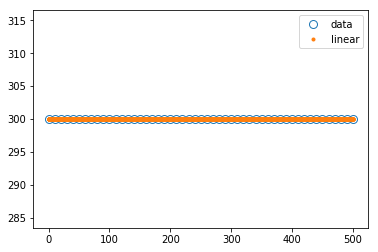

In [27]:
plt.plot(t_level, Tc_level, 'o', label='data', markersize = 8, mfc='none')
plt.plot(t, Tc_linear(t), '.', label='linear')
#plt.plot(t, Tc_cubic(t), '--', label='cubic')
plt.legend(loc='best')
plt.show()

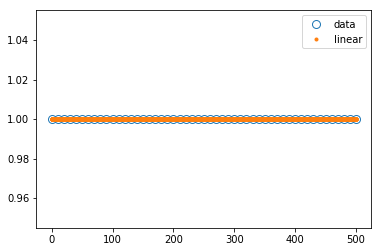

In [28]:
plt.plot(t_level, Cin_level, 'o', label='data', markersize = 8, mfc='none')
plt.plot(t, Cin_linear(t), '.', label='linear')
#plt.plot(t, Cin_cubic(t), '--', label='cubic')
plt.legend(loc='best')
plt.show()

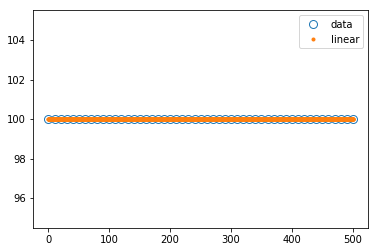

In [29]:
plt.plot(t_level, Q_level, 'o', label='data', markersize = 8, mfc='none')
plt.plot(t, Q_linear(t), '.', label='linear')
#plt.plot(t, Q_cubic(t), '--', label='cubic')
plt.legend(loc='best')
plt.show()

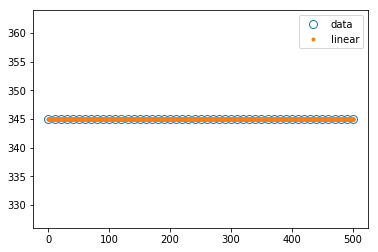

In [30]:
plt.plot(t_level, Tin_level, 'o', label='data', markersize = 8, mfc='none')
plt.plot(t, Tin_linear(t), '.', label='linear')
#plt.plot(t, Q_cubic(t), '--', label='cubic')
plt.legend(loc='best')
plt.show()

In [167]:
Tc = Tc_linear(t)
Cin = Cin_linear(t)
Q = Q_linear(t)
Tin = Tin_linear(t)
Ca = np.ones(len(t)) * Ca_ss
T = np.ones(len(t)) * T_ss

In [168]:
## Change noise level here

Tc = Tc + np.random.normal(0, 1, 5001)
Cin = Cin + np.random.normal(0, .05, 5001)
Q = Q + np.random.normal(0, 0.5, 5001)
Tin = Tin + np.random.normal(0, 0.05, 5001)

In [169]:
# Simulate CSTR

#for i in range(1:18)
    for i in range(len(t)-1):
        ts = [t[i],t[i+1]]
        y = odeint(cstr,x0,ts,args=(Tc[i+1], Cin[i+1], Q[i+1], Tin[i+1]))
        Ca[i+1] = y[-1][0]
        T[i+1] = y[-1][1]
        x0[0] = Ca[i+1]
        x0[1] = T[i+1]
#         data = np.vstack((t,Tc,T)) # vertical stack
#         data = data.T              # transpose data
#         np.savetxt('cstr_step_tests_functional_ontology_linear_smooth.txt',data,delimiter=',',\
#                header='Time,Tc,T',comments='')
#         df = pd.DataFrame()

#         df["time"] = t
#         df["coolingTemp"] = Tc
#         df["concentrationA_inlet"] = Cin
#         df["Temp_inlet"] = Tin
#         df["flowRate"] = Q
#         df["concentrationA"] = Ca
#         df["Temp"] = T

#         df.to_csv("/mnt/DATA/Tin & Tc Variation/data_345_Tin_275Tc_2.csv", index=False)
    
    
    
    
# Construct results and save data file
# Column 1 = time
# Column 2 = cooling temperature
# Column 3 = reactor temperature
data = np.vstack((t,Tc,T)) # vertical stack
data = data.T              # transpose data
np.savetxt('cstr_step_tests_functional_ontology_linear_smooth.txt',data,delimiter=',',\
           header='Time,Tc,T',comments='')


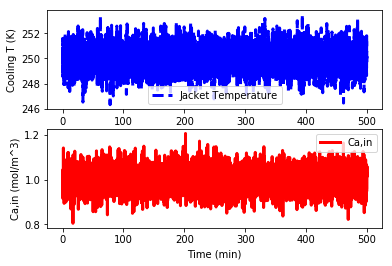

In [47]:
# Plot the results
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,Tc,'b--',lw=3)
plt.ylabel('Cooling T (K)')
plt.legend(['Jacket Temperature'],loc='best')

plt.subplot(2,1,2)
plt.plot(t,Cin,'r-',lw=3)
plt.ylabel('Ca,in (mol/m^3)')
plt.xlabel('Time (min)')
plt.legend(['Ca,in'],loc='best')


plt.show()

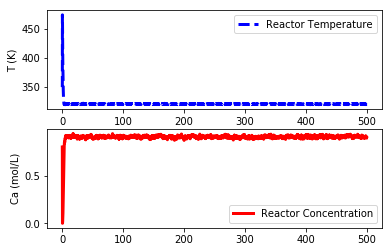

In [35]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(t,T,'b--',lw=3)
plt.ylabel('T (K)')
plt.xlabel('Time (min)')
plt.legend(['Reactor Temperature'],loc='best')

plt.subplot(2,1,2)
plt.plot(t,Ca,'r-',lw=3)
plt.ylabel('Ca (mol/L)')
plt.legend(['Reactor Concentration'],loc='best')

plt.show()

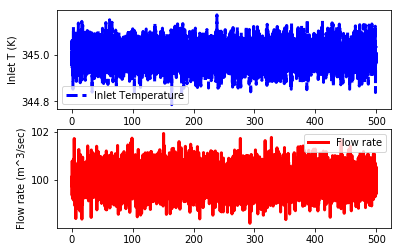

In [36]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,Tin,'b--',lw=3)
plt.ylabel('Inlet T (K)')
plt.xlabel('Time (min)')
plt.legend(['Inlet Temperature'],loc='best')

plt.subplot(2,1,2)
plt.plot(t,Q,'r-',lw=3)
plt.ylabel('Flow rate (m^3/sec)')
plt.legend(['Flow rate'],loc='best')
plt.show()

In [170]:
df = pd.DataFrame()

df["time"] = t
df["coolingTemp"] = Tc
df["concentrationA_inlet"] = Cin
df["Temp_inlet"] = Tin
df["flowRate"] = Q
df["concentrationA"] = Ca
df["Temp"] = T

In [171]:
df

,time,coolingTemp,concentrationA_inlet,Temp_inlet,flowRate,concentrationA,Temp
0,0.0,274.846973,1.042039,345.027678,100.536308,0.800000,350.000000
1,0.1,275.552745,0.944867,344.911249,100.336949,0.739848,350.139598
2,0.2,275.154115,0.981389,344.973309,99.575355,0.696625,348.667000
3,0.3,275.141649,1.018052,344.980998,99.695617,0.674500,345.017765
4,0.4,275.631089,1.022592,344.952136,100.105725,0.670985,339.410292
...,...,...,...,...,...,...,...
4996,499.6,273.953922,1.026406,344.933013,100.085977,0.991923,298.469618
4997,499.7,274.584650,0.960061,344.957363,100.708143,0.987616,298.435840
4998,499.8,274.123351,0.935427,344.994712,99.749043,0.981424,298.289374
4999,499.9,274.199775,0.951225,345.007162,99.486674,0.977349,298.182054


In [172]:
df.to_csv("/mnt/DATA/Tin & Tc Variation/data_345_Tin_275Tc_2.csv", index=False)

## Reference

http://apmonitor.com/do/index.php/Main/NonlinearControl

https://apmonitor.com/pdc/index.php/Main/StirredReactor
    

In [15]:
n = np.arange(1,19)
n

np.repeat(25,25)


array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25])